# Winter 2022 Data Science Intern Challenge 

### Ramil Chaimongkolbutr 

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!

***

**Question 1**: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.  

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.  
b. What metric would you report for this dataset?  
c. What is its value?


**Question 2**: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total?  
b. What is the last name of the employee with the most orders?  
c. What product was ordered the most by customers in Germany?  


***

## Question 1

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Let's import the dataset and the necessary libraries.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [46]:
df.duplicated().value_counts()

False    5000
dtype: int64

After we import the dataset, we take a preliminary look on it just to get some insights about the dataset. Then we will focus on where the issue about the average order value (AOV) is located. We need to see some descriptive statistics of the dataset.

In [22]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [23]:
df['order_amount'].mean()

3145.128

Now we can see cleary from where the naive AOV of $3145.13 comes. Without taking a look at the distribution of the data, The arithmetic mean can lead to wrongly represent the central tendency of the data. For example, the extreme values (or outliers) can significantly increase or decrease the mean when they are included in the calculation. As a result, this can make the mean a poor estimate for the AOV.

Text(0.5, 1.0, 'Box Plot without outliers')

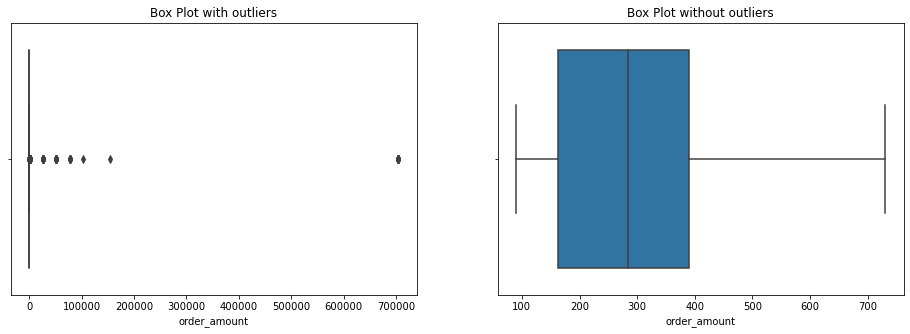

In [43]:
fig, axes = plt.subplots(1,2, figsize=(16,5))

sns.boxplot(x=df['order_amount'], ax=axes[0])
sns.boxplot(x=df['order_amount'], showfliers = False, ax=axes[1])

axes[0].set_title("Box Plot with outliers")
axes[1].set_title("Box Plot without outliers")

From the box plots, we can see that there are many extreme order amounts in the column in comparison to one without the outliers. Since all the outliers are extremely further away from any of the other values, it surely can shift our AOV upward, which seems to be the case of ours. **Since the mean is highly affected by the extreme values, we think that there are 2 better ways to evaluate the data:**  
**1. We can use the median**.  
**2. In case we would like to stick with the mean, we can use it by ignoring outliers**.  

### b. What metric would you report for this dataset?

As mentioned above, **the median** of the column would be a better metric to report this dataset since it is not affected by the extreme of some values. 

### c. What is its value?

In [50]:
df['order_amount'].median()

284.0

Therefore, the better way to represent the AOV of the `order_amount` column is to use the **median** of **284.0**. 

***

## Question 2

### a. How many orders were shipped by Speedy Express in total?

```
SELECT COUNT(*) as NumberOrder
FROM Orders JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = "Speedy Express";
```

We join 2 tables between Orders and Shippers to get shipper's name by ShipperID. Then we count the rows whose ShipperName is 'Speedy Express.' The total orders that were shipped by Speedy Express are **54**.

### b. What is the last name of the employee with the most orders?

```
SELECT Employees.LastName, COUNT(*) AS NumberOrder 
FROM Orders JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName 
ORDER BY NumberOrder DESC
LIMIT 1;
```

We join 2 tables between Orders and Employees to get employees' lastnames and count each of them. Then we order it descendingly and limit the result to one to get the most orders of **40** by the last name, **Peacock**.

### c. What product was ordered the most by customers in Germany?

```
SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS TotalQuantity
FROM Orders JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderId
JOIN Customers ON Orders.CustomerID = Customers.CustomerID
JOIN Products ON OrderDetails.ProductID = Products.ProductID
WHERE Customers.Country = "Germany"
GROUP BY OrderDetails.ProductID
ORDER BY TotalQuantity DESC
LIMIT 1;
```

We have to join 4 tables in this case among Orders, OrderDetail, Customers, and Products. First, we join Orders with OrderDetails to get the ProductID and Quantity. Then we join Orders with Customers to get countries of customers. Lastly we join with Products to get the name of each product. After joining them, we group the data by its ProductID and find the total quantity of each ProductID. We order the total quantity and limit it to one to get **Boston Crab Meat** as the most ordered product by customers in Germany with the total quantity of **160**.

***